In [1]:
import numpy as np
from gensim.models.keyedvectors import KeyedVectors
import networkx as nx
import matplotlib.pyplot as plt

from utils import*

In [2]:
model_path = '/home/mitya/PycharmProjects/nlp_graph/model.bin'
model = KeyedVectors.load_word2vec_format(model_path, binary=True)

In [3]:
text = "Есть рядом две земли: Швейцария и Италия. Между этими двумя землями есть горы Альпы. Горы эти так высоки, что снег на них никогда не тает. По дороге из Швейцарии в Италию надо переходить через эти горы. Дорога идёт через гору Сан-Готард. На самом верху этой горы, на дороге, построен монастырь. И в этом монастыре живут монахи. Монахи эти молятся Богу и пускают к себе дорожных людей на отдых и на ночлег. На Сан-Готарде всегда бывает пасмурно; летом туман, и ничего не видно. А зимой бывают такие метели, что на пять аршин заносит снегом. И проезжие и прохожие часто замерзают в эти метели. У монахов есть собаки. И собаки эти приучены отыскивать в снегу людей.Один раз по дороге в Швейцарию шла женщина с ребёночком. Началась метель; женщина сбилась с дороги, села в снегу и застыла. Монахи вышли с собаками и нашли женщину с ребёночком. Монахи отогрели ребёночка и выкормили. А женщину они принесли уже мёртвую и похоронили у себя в монастыре."

In [4]:
text_tagged = pymorphy_tagger(clean_numbers(text))
text_tagged = text_tagged.split()

In [5]:
text_mat = adjacency_mat(text_tagged)

In [6]:
graph = make_graph(text_mat, text_tagged, 0.1)

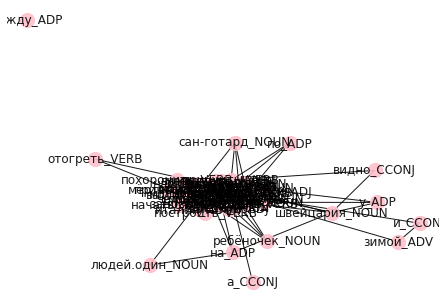

In [7]:
draw_graph(graph, 200, 0.9, show_weights=False)

#### text average clustering coefficient (filtration by metric)

In [8]:
nx.average_clustering(graph)

0.7764678333337313

In [9]:
average_clustering = {}
for i in np.arange(0.1, 0.9, 0.1):
    graph = make_graph(text_mat, text_tagged, i)
    average_clustering['threshold_{}'.format(i)] = nx.average_clustering(graph)
    #coeff = nx.average_clustering(graph)
    #average_clustering

In [10]:
average_clustering

{'threshold_0.1': 0.7764678333337313,
 'threshold_0.2': 0.5836909675198114,
 'threshold_0.30000000000000004': 0.3032516262265539,
 'threshold_0.4': 0.13797814207650272,
 'threshold_0.5': 0.06284153005464481,
 'threshold_0.6': 0.0,
 'threshold_0.7000000000000001': 0.0,
 'threshold_0.8': 0.0}

([<matplotlib.axis.XTick at 0x7fe99fbbe9d0>,
 [Text(0, 0, 'threshold_0.1'),
  Text(1, 0, 'threshold_0.2'),
  Text(2, 0, 'threshold_0.30000000000000004'),
  Text(3, 0, 'threshold_0.4'),
  Text(4, 0, 'threshold_0.5'),
  Text(5, 0, 'threshold_0.6'),
  Text(6, 0, 'threshold_0.7000000000000001'),
  Text(7, 0, 'threshold_0.8')])

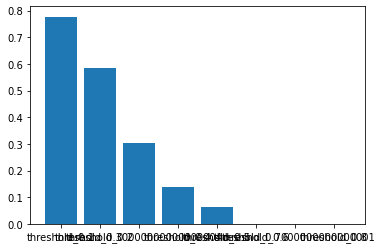

In [11]:
plt.bar(range(len(average_clustering)), list(average_clustering.values()), align='center')
plt.xticks(range(len(average_clustering)), list(average_clustering.keys()))